In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Inputs

In [181]:
# Engineering inputs
test_temp = 35 # °C
design_temp = 485 # °C
design_pres = 18.4 # MPa

In [128]:
## --- ASME B31.3-2018 Table A-1M Basic Allowable Stresses in Tension for Metals (SI Units)

# pdf page 273
# Line NominalComp ProductForm SpecNo TypeGrade UNS Closs Size P_No Notes MinTempC MinTensileMPa MinYieldMPa MaxUseTempC MinTempto40
# 36 Carbon steel Pipe & tube API 5L B … … … 1 (57)(59)(77) B 414 241 593 (Derate Temp > 200°C) (Note 4a boldface (90% yield) > 375°C)
x = ' 65 100 150 200 250 300 325 350 375 400 425 450 475 500 525 550 575 600'
y = '138 138 138 138 132 126 122 118 113 95.1 79.5 62.6 45.0 31.7 21.4 14.2 9.40 6.89'

# pdf page 299
# 81 18Cr–10Ni–Cb Smls. & wld. pipe A312 TP347H S34709 … … 8 (Derate Temp > 250°C) (Note 4a boldface (90% yield) > 575°C)
# Line Notes MinTempC MinTensileMPa MinYieldMPa MaxUseTempC MinTempto40 | 81 … −198 517 207 816 138
# x = ' 138 138 138 138 138 138 138 138 137 135 132 130 129 127 126 126 125 125 125 125 112 90.6 69.6 53.8 41.4 31.8 24.0 18.8 14.6 10.9 8.96'
# y = ' 65 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825'

# Temp. assignment to show option use case later. Not used anywhere else.
x_str = x
y_str = y


# Cleanup

In [129]:
# Split out the one string variables into a numpy array of float type values
# https://stackoverflow.com/questions/1614236

x = np.array(x.split()).astype(np.float)
y = np.array(y.split()).astype(np.float)

if len(x) != len(y):
    print('WARNING: The number of values (length) of the input ranges to not match. Go back and fix')


In [130]:
x

array([ 65., 100., 150., 200., 250., 300., 325., 350., 375., 400., 425.,
       450., 475., 500., 525., 550., 575., 600.])

In [132]:
# The following is another option to convert the string into a list of float values
x_lst = list(map(float,filter(None, x_str.split(' '))))
y_lst = list(map(float,filter(None, y_str.split(' '))))
x_lst[:5]

[65.0, 100.0, 150.0, 200.0, 250.0]

# Analysis

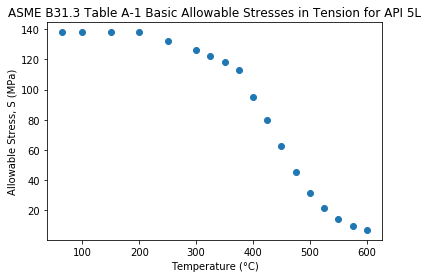

In [183]:
# Set up plot parameters
fig, ax = plt.subplots()
ax.plot(x,y, 'o')

ax.set(xlabel='Temperature (°C)', ylabel='Allowable Stress, S (MPa)',
       title='ASME B31.3 Table A-1 Basic Allowable Stresses in Tension for API 5L')

fig.savefig("asme_b31_3_table_a_1_api_5l.png")
plt.show()

In [160]:
# Interpolate a 1-D function using SciPy interpolate function

y_bound_xmin = y[0]
y_bound_xmax = 0

f = interpolate.interp1d(x, y, bounds_error=False, 
                                     fill_value=(y_bound_xmin, y_bound_xmax) )

In [161]:
# find the interpolated results for the given x input(s)
f(design_temp)

array(39.68)

In [162]:
# find the interpolated results for the given x input(s)
f([30, design_temp, 601]) 

array([138.  ,  39.68,   0.  ])

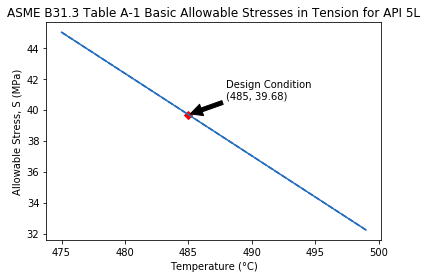

In [184]:
# Find the x values on both sides of the design temperature to zoom in
z = np.min(np.where(x > design_temp))

# Interpolate between the data points of x and y supplied and shown as dots above
xnew = np.arange(x[z-1],x[z],1)
ynew = f(xnew)

# Set up plot parameters
fig, ax = plt.subplots()
ax.plot(xnew, ynew, 'b--')

ax.set(xlabel='Temperature (°C)', ylabel='Allowable Stress, S (MPa)',
       title='ASME B31.3 Table A-1 Basic Allowable Stresses in Tension for API 5L')

ax.annotate('Design Condition\n(' + str(design_temp) + ', ' + str(f(design_temp)) + ')',
            xy=(design_temp, f(design_temp)),
           xytext=(design_temp+3, f(design_temp)+1), arrowprops=dict(facecolor='black',
                                                    shrink=0.05),)
plt.plot(design_temp, f(design_temp),'rD')
fig.savefig("asme_b31_3_table_a_1_api_5l_zoom.png")
plt.plot(xnew,ynew,'-');

# Calculation 

**345.4.2 Test Pressure**
$$
P_T = 1.5 P S_T / S \tag{24}
$$
where  
_P_ = internal design gage pressure, MPa  
_P<sub>T_ = minimum test gage pressure, MPa  
_S_ = allowable stress at component design temperature for the prevalent pipe material; see
Table A-1 or Table A-1M, MPa  
_S<sub>T_ = allowable stress at test temperature for the prevalent pipe material; see Table A-1 or
Table A-1M, MPa  


In [145]:
b31_3_allow = f(design_temp)
stress_ratio = f(test_temp) / f(design_temp)
test_pres = 1.5 * design_pres * stress_ratio
test_ratio = test_pres / design_pres

print(f'Allowable Stress at test temperature: {f(test_temp):.1f} MPa')
print(f'Allowable Stress at design temperature: {f(design_temp):.1f} MPa')
print(f'Test Pressure: {test_pres:.1f} MPa. Overall ratio to Design pressure: {test_ratio:.1f}')

Allowable Stress at test temperature: 138.0 MPa
Allowable Stress at design temperature: 38.1 MPa
Test Pressure: 100.0 MPa. Overall ratio to Design pressure: 5.4


# Sandbox

Result comparision check to interpolation done using excel tables, Item 6  
https://www.bradleysawler.com/engineering/linear-interpolation-using-excel-tables/

In [176]:
one_liner = interpolate.interp1d([100,150], [46.6,45.1])
print(f'ASME B16.34 Table 2-1.1 Temperature 125°C, CL300, working pressure: {one_liner(125):.1f} bar')

ASME B16.34 Table 2-1.1 Temperature 125°C, CL300, working pressure: 45.9 bar
